<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k"/>
</div>
</div>

# Big Data Wrangling With Google Books Ngrams

In this assignment, we will apply the skills we've learned in the Big Data Fundamentals unit to load, filter, and visualize a large real-world dataset in a cloud-based distributed computing environment using Hadoop, Spark, Hive, and the S3 filesystem. We will prepare a professional report to summarize the findings and be sure to include an appendix with screenshots of the steps completed for Questions 1 and 2.

The Google Ngrams dataset was created by Google's research team by analyzing all of the content in Google Books - these digitized texts represent approximately 4% of all books ever printed, and span a time period from the 1800s into the 2000s.

The dataset is hosted in a public S3 bucket as part of the Amazon S3 Open Data Registry. For this assignment, we have converted the data to CSV and hosted it on a public S3 bucket which may be accessed here: s3://brainstation-dsft/eng_1M_1gram.csv

For this deliverable, we will produce a report, as well as a jupyter notebook, which will follow a Big Data analysis workflow. As part of this workflow we will filter and reduce data down to a manageable size, and then do some analysis locally on our machine after extracting data from the Cloud and processing it using Big Data tools. The workflow and steps in the process are illustrated below:

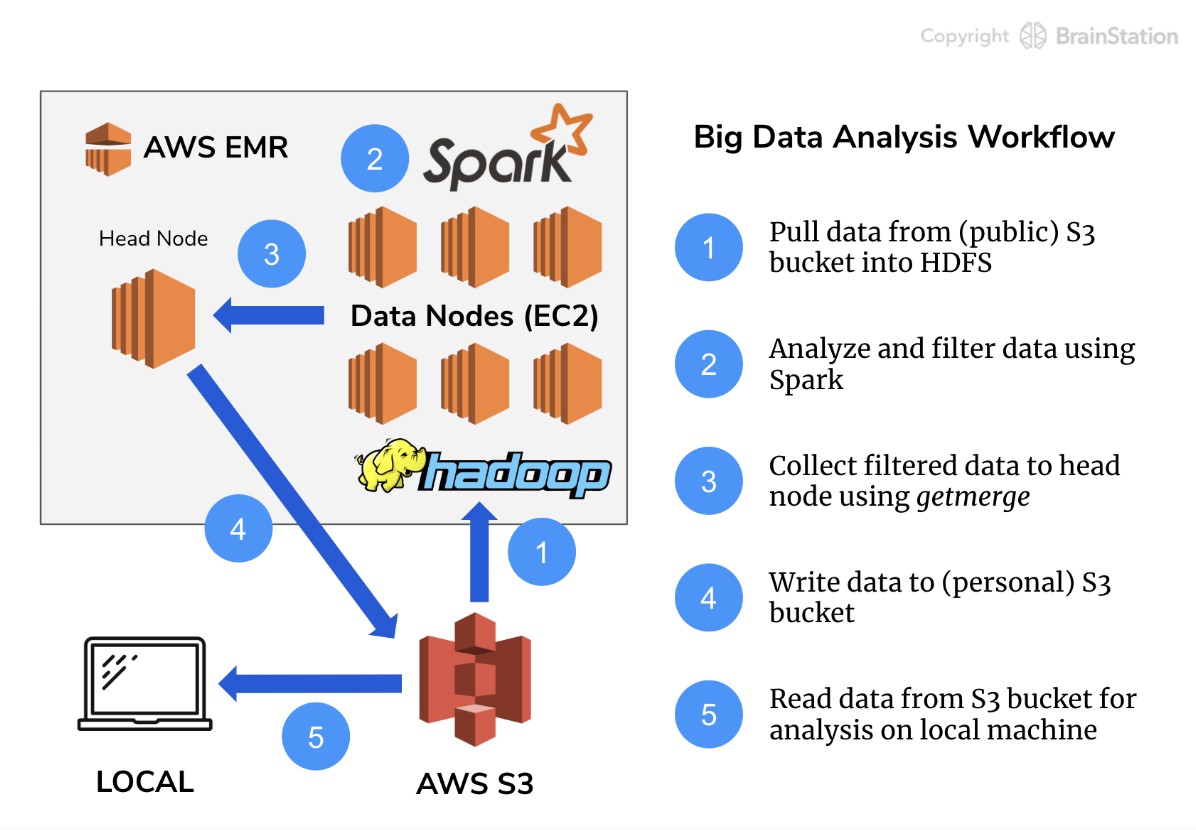

1.  Up untill now we spined up a new EMR cluster using the AWS Console and we included Hadoop, Spark, Hive, Jupyterhub, and Livy for our cluster with the release version of EMR 6.1.1.


2.  Then we connected to the head node of the cluster using SSH.


3.  Then we copied the data folder from s3://brainstation-dsft/eng_1M_1gram.csv into a directory on the Hadoop File System (HDFS) named /user/hadoop/eng_1M_1gram.



4.  Now we are in step 4:

## Step 4

In this step by using pyspark, we will read the data we copied into HDFS in Step 3 with a PySpark notebook that we created. Since we have created a pyspark DataFrame and now we are in it, we will complete the following steps below:


a. Describe the dataset (examples include size, shape, schema) in pyspark.


b. Create a new DataFrame from a query using Spark SQL, filtering to include only the rows where the token is "data" and describe the new dataset.


c. Write the filtered data back to a directory in the HDFS from Spark using df.write.csv(). Be sure to pass the header=True parameter and examine the contents of what you've written.



- First we have to  initialize the SparkContext and SparkSession:

In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1675628932349_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

- Now we will read the data:

In [3]:
# read the data

data = spark.read.csv("/user/hadoop/eng_1M_1gram", header=True)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 4.a

- Now we will describe the dataset (examples include size, shape, schema) in pyspark:

In [4]:
# Get the shape of the dataset

print("Number of rows:", data.count())
print("Number of columns:", len(data.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of rows: 261823225
Number of columns: 5

- Our dataset has 261823225 rows and 5 columns. Let's see the columns our dataset:

In [19]:
# columns

data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['token', 'year', 'frequency', 'pages', 'books']

- Now let's see the schema of our dataset:

In [5]:
# Get the schema of the dataset

data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- token: string (nullable = true)
 |-- year: string (nullable = true)
 |-- frequency: string (nullable = true)
 |-- pages: string (nullable = true)
 |-- books: string (nullable = true)

- Let's see the first 20 rows of the dataset:

In [20]:
# First 20 rows

data.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----+---------+-----+-----+
|    token|year|frequency|pages|books|
+---------+----+---------+-----+-----+
|inGermany|1927|        2|    2|    2|
|inGermany|1929|        1|    1|    1|
|inGermany|1930|        1|    1|    1|
|inGermany|1933|        1|    1|    1|
|inGermany|1934|        1|    1|    1|
|inGermany|1935|        1|    1|    1|
|inGermany|1938|        5|    5|    5|
|inGermany|1939|        1|    1|    1|
|inGermany|1940|        1|    1|    1|
|inGermany|1942|        2|    2|    2|
|inGermany|1944|        2|    2|    2|
|inGermany|1946|        2|    2|    2|
|inGermany|1947|        3|    3|    2|
|inGermany|1948|        1|    1|    1|
|inGermany|1949|        1|    1|    1|
|inGermany|1952|        1|    1|    1|
|inGermany|1956|        1|    1|    1|
|inGermany|1957|        2|    2|    2|
|inGermany|1959|        1|    1|    1|
|inGermany|1960|        3|    3|    3|
+---------+----+---------+-----+-----+
only showing top 20 rows

### 4.b

- Now we will create a new DataFrame from a query using Spark SQL, filtering to include only the rows where the token is "data" and then we will describe the new dataset:

- Using SQL requires the CreateorReplaceTempView function, which registers the data as a view in the Spark session. We can then query against that view with SQL, with the view name being the table name:

In [21]:
# Create a view

data.createOrReplaceTempView("ngrams")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# Create a new DataFrame from a query using Spark SQL

filtered_data = spark.sql("SELECT * FROM ngrams WHERE token = 'data'")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

- Now we created a new DataFrame (filtered_data) using Spark SQL and filtered it to include only the rows where the token is "data". Now let's describe the new dataset:

In [23]:
# Get the shape of the filtered dataset

print("Number of rows:", filtered_data.count())
print("Number of columns:", len(filtered_data.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of rows: 316
Number of columns: 5

- Our dataset has 316 rows and 5 columns. Let's see the columns our dataset:

In [27]:
# columns

filtered_data.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['token', 'year', 'frequency', 'pages', 'books']

In [28]:
# Get the schema of the dataset

filtered_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- token: string (nullable = true)
 |-- year: string (nullable = true)
 |-- frequency: string (nullable = true)
 |-- pages: string (nullable = true)
 |-- books: string (nullable = true)

- We saw the columns and schema of the filtered dataset again. Let's see the first 20 rows of the filtered dataset:

In [29]:
# First 20 rows of the filtered dataset

filtered_data.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+---------+-----+-----+
|token|year|frequency|pages|books|
+-----+----+---------+-----+-----+
| data|1584|       16|   14|    1|
| data|1614|        3|    2|    1|
| data|1627|        1|    1|    1|
| data|1631|       22|   18|    1|
| data|1637|        1|    1|    1|
| data|1638|        2|    2|    1|
| data|1640|        1|    1|    1|
| data|1642|        1|    1|    1|
| data|1644|        4|    4|    1|
| data|1647|        1|    1|    1|
| data|1651|        1|    1|    1|
| data|1674|        1|    1|    1|
| data|1690|        1|    1|    1|
| data|1693|        1|    1|    1|
| data|1697|        1|    1|    1|
| data|1699|        1|    1|    1|
| data|1700|        1|    1|    1|
| data|1701|       11|   11|    2|
| data|1702|        1|    1|    1|
| data|1703|        1|    1|    1|
+-----+----+---------+-----+-----+
only showing top 20 rows

- Number of rows of our filtered dataset:

In [30]:
# Number of rows of filtered data

filtered_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

316

- **we see that the number of rows of our dataset changed from 261823225 to 316 rows.**

### 4.c

- Now let's write the filtered data back to a directory in the HDFS from Spark using df.write.csv(). We have to be sure to pass the header=True parameter and examine the contents of what we've written:

In [31]:
# Write the filtered data back to HDFS

filtered_data.write.csv("/user/hadoop/filtered_data", header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

- This will write the filtered dataFrame to a directory in HDFS named /user/hadoop/filtered_data with header information.

- To examine the contents of what you've written, you can use the following command in Git Bash:

  hadoop fs -cat /user/hadoop/filtered_data/*

- We can also use the following command to view the directory structure in HDFS:

   hadoop fs -ls /user/hadoop/filtered_data


- Our work here is finished so we can stop the spark session:

In [32]:
spark.stop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

- The step 4 is finished. Now we have to proceed to step 5 to collect the data using merge and then step 6 to create a jupyter notebook on our local machine.